In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Epsilon:
    """
    Agente que soluciona el problema del el Bandido Multibrazo
    (Multi-Armed Bandit) mediante el uso de una estrategia Epsilon
    Greedy
    
    Parámetros
    ----------
    bandits : array of Bandit
        Vector con los bandidos con los que se debe jugar
    epsilon : float
        Porcentaje de veces en las que el agente jugada de forma
        aleatoria
    decay : float
        Velocidad con la que decae la probabilidad de seleccionar una
        jugada al azar
    initial: array of float
        Valor inicial de la recompensa esperada para cada uno de
        bandidos
    Métodos
    -------
    run :
        Realiza una tirada en el bandido
    average_reward :
        Obtención de la recompensa promedio
    plot :
        Representación gráfica del histórico de jugadas
    reset :
        Reinicia el agente
    """
    
    def __init__(self, bandits, epsilon=0.05, decay=1, initial=None):
        self.bandits = bandits
        self.epsilon = epsilon
        self.decay = decay
        self.reset(initial)
        
        
    def run(self, episodes=1):
        for i in range(episodes):
            prob = np.random.random()
            
            # Selección entre la jugada aleatoria o avariciosa
            if prob < self._epsilon:
                bandit = np.random.choice(len(bandits))
            else:
                max_bandits = np.where(self._mean == np.max(self._mean))[0]
                bandit = np.random.choice(max_bandits)

            # Decaimiento del parámetro epsilon
            self._epsilon *= self.decay
            
            # Obtención de una nueva recompensa
            reward = bandits[bandit].pull()
            
            # Agregación de la recompensa al listado
            self._rewards.append(reward)
            
            # Actualización de la media
            self._plays[bandit] += 1
            self._mean[bandit] = (1 - 1.0/self._plays[bandit]) * self._mean[bandit] \
                                 + 1.0/self._plays[bandit] * reward
        
        return self.average_reward()
    
    
    def average_reward(self):
        return np.mean(self._rewards)
    
    
    def plot(self, log=False, reference=False, label=None):
        cumulative_average = np.cumsum(self._rewards) / (np.arange(len(self._rewards)) + 1)
        
        if label is None:
            plt.plot(range(len(self._rewards)), cumulative_average)
        else:
            plt.plot(range(len(self._rewards)), cumulative_average, label=label)
            
        if reference:
            for reward in [b.reward for b in self.bandits]:
                plt.plot([0, len(self._rewards)], [reward, reward],
                         label=f'reward={reward}')
                
        if log:
            plt.xscale('log')
    
    
    def reset(self, initial=None):
        self._rewards = []
        
        if initial is None:
            self._epsilon = self.epsilon
            self._plays = [0] * len(self.bandits)
            self._mean = [0] * len(self.bandits)
        else:
            self._epsilon = 0
            self._plays = [1] * len(self.bandits)
            self._mean = initial

0.09595
0.09595
0.10095


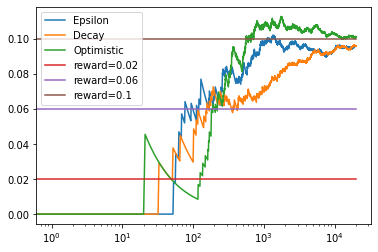

In [2]:
class Bandit:
    """
    Implementación de un Bandido Multibrazo (Multi-Armed Bandit) basado
    en una distribución binomial

    Parámetros
    ----------
    number: integer
        Número de recompensas que puede devolver el agente
    probability : float
        Probabilidad de que el objeto devuelva una recompensa
    
    Métodos
    -------
    pull :
        Realiza una tirada en el bandido
        
    """
    def __init__(self, probability, number=1):
        self.number = number
        self.probability = probability
        self.reward = self.number * self.probability
        
        
    def pull(self):        
        return np.random.binomial(self.number, self.probability) 
        
    
    
np.random.seed(0)

bandits = [Bandit(0.02), Bandit(0.06), Bandit(0.10)]
original=bandits
epsilon = Epsilon(bandits)
decay = Epsilon(bandits, epsilon=1, decay=0.999)
optimistic = Epsilon(bandits, initial=[0.2, 0.2, 0.2])

print(epsilon.run(20000))
print(decay.run(20000))
print(optimistic.run(20000))

epsilon.plot(True, label='Epsilon')
decay.plot(True, label='Decay')
optimistic.plot(True, True, label='Optimistic')
plt.legend();

In [3]:
print('Epsilon-Greedy jugadas: ',epsilon._plays)
print('Epsilon-Greedy-Decay jugadas: ',decay._plays)
print('Valores Iniciales Optimistas jugadas: ',optimistic._plays)

Epsilon-Greedy jugadas:  [381, 355, 19264]
Epsilon-Greedy-Decay jugadas:  [333, 352, 19315]
Valores Iniciales Optimistas jugadas:  [90, 16, 19897]


0.05865


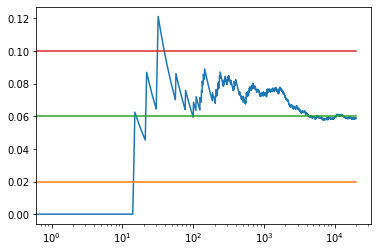

In [4]:
np.random.seed(0)
optimistic2 = Epsilon(bandits, initial=[0.09, 0.09, 0.09])
print(optimistic2.run(20000))
optimistic2.plot(True, True, label='Optimistic')

In [5]:
print('Valores Iniciales Optimistas jugadas: ',optimistic2._plays)

Valores Iniciales Optimistas jugadas:  [6, 19991, 6]
